### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [1]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [6]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
wine.duplicated().sum()

1168

In [12]:
wine_data = wine.dropna()

In [13]:
wine_data = wine_data.drop_duplicates()

In [14]:
wine_data.shape

(5295, 13)

In [15]:
wine_data.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [16]:
X = wine_data.drop('type', axis=1)
Y = wine_data['type']

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_scale, y_train)


KNeighborsClassifier()

In [24]:
y_predict = knn.predict(x_test_scale)

In [27]:
accuracy = accuracy_score(y_test, y_predict)
print(x_train_scale.shape[1])
print(accuracy)

12
0.9924457034938622


# Apply PCA on the standardized features

In [29]:
pca = PCA(n_components=5)

In [30]:
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)


In [31]:

x_train_pca.shape

(4236, 5)

In [32]:
x_train.shape

(4236, 12)

In [36]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [37]:
y_predict_pca = knn_pca.predict(x_test_pca)

In [40]:
accuracy_pca = accuracy_score(y_test, y_predict_pca)
print(accuracy_pca)
print(x_train_pca.shape[1])

0.9867799811142587
5


In [43]:
for i in range(5,13):
  pca = PCA(n_components=i)
  x_train_pca = pca.fit_transform(x_train_scale)
  x_test_pca = pca.transform(x_test_scale)

  knn = KNeighborsClassifier(n_neighbors=5)
  knn_pca.fit(x_train_pca, y_train)
  y_predict_pca = knn_pca.predict(x_test_pca)
  accuracy_pca = accuracy_score(y_test, y_predict_pca)
  print(accuracy_pca)
  print(x_train_pca.shape[1])



0.9867799811142587
5
0.9896128423040604
6
0.9896128423040604
7
0.9933899905571294
8
0.9924457034938622
9
0.9915014164305949
10
0.9924457034938622
11
0.9924457034938622
12


In [44]:
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)

knn = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train)
y_predict_pca = knn_pca.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test, y_predict_pca)
print(accuracy_pca)
print(x_train_pca.shape[1])

0.9924457034938622
12


In [46]:
pca.components_.shape

(12, 12)

In [47]:
pca.explained_variance_ratio_.shape

(12,)

In [48]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.25338398, 0.47402709, 0.61160755, 0.70106477, 0.77167309,
       0.82631561, 0.87149731, 0.91392156, 0.95330812, 0.97845091,
       0.99707145, 1.        ])

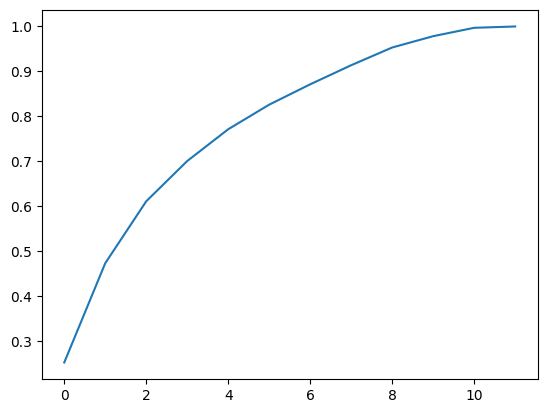

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))